In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("AQI.csv")

In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,02-01-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,02-01-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,02-01-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,03-01-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,03-01-1990


In [4]:
df.drop(columns=['stn_code','agency','location_monitoring_station','sampling_date'],inplace=True)

In [5]:
df.dropna(subset=['date','location'],inplace=True)

In [6]:

location_mapping = {
    'Vishakhapatnam': 'Visakhapatnam',
    'Silcher': 'Silchar',
    'Cochin': 'Kochi',
    'Kozhikode': 'Calicut',
    'Trivendrum': 'Thiruvananthapuram',
    'Madras': 'Chennai',
    'Bhubaneshwar': 'Bhubaneswar',
    'Greater Mumbai': 'Mumbai',
    'Aurangabad (MS)': 'Aurangabad',
    'Pondichery': 'Pondicherry',
    'Durgapur (WB)': 'Durgapur',
    'Baroda': 'Vadodara',
    'Anklesvar': 'Ankleshwar',
    'ANKLESHWAR': 'Ankleshwar',
    'VAPI': 'Vapi',
    
}


df['location'] = df['location'].replace(location_mapping)

In [8]:
types = {
 "Residential": "R",
 "Residential and others": "RO",
 "Residential, Rural and other Areas": "RRO",
 "Industrial Area": "I",
 "Industrial Areas": "I",
 "Industrial": "I",
 "Sensitive Area": "S",
 "Sensitive Areas": "S",
 "Sensitive": "S",
 np.nan: "RRO"
 }
df['type'] = df['type'].replace(types)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435735 entries, 0 to 435738
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435735 non-null  object 
 1   location  435735 non-null  object 
 2   type      435735 non-null  object 
 3   so2       401092 non-null  float64
 4   no2       419505 non-null  float64
 5   rspm      395516 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 33.2+ MB


In [17]:
df['so2'].fillna(df['so2'].mean(),inplace=True)
df['no2'].fillna(df['no2'].mean(),inplace=True)
df['rspm'].fillna(df['rspm'].mean(),inplace=True)
df['spm'].fillna(df['spm'].mean(),inplace=True)
df['pm2_5'].fillna(df['pm2_5'].mean(),inplace=True)

In [19]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
dtype: int64

In [21]:
df['date'] = df['date'].str.replace('/', '-', regex=False)

In [23]:
df['date'] = pd.to_datetime(df['date'], dayfirst=False)

In [25]:
df['year'] = df['date'].dt.year

In [27]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,108.833091,220.78348,40.791467,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,108.833091,220.78348,40.791467,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,108.833091,220.78348,40.791467,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,108.833091,220.78348,40.791467,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,108.833091,220.78348,40.791467,1990-03-01,1990


In [29]:
yearly_df = df.groupby('year')['so2'].mean().reset_index()

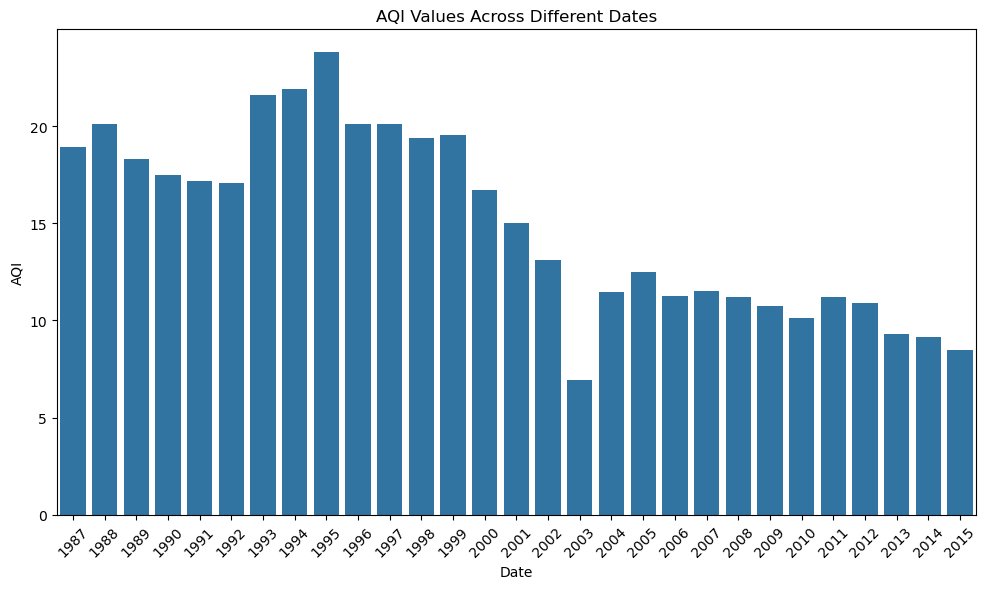

In [263]:
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_aqi, x='year', y='so2', ci=None)
plt.title('AQI Values Across Different Dates')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
def plotv(v):
    
    yearly_aqi = df.groupby('year')['so2'].mean().reset_index()
    plt.figure(figsize=(20, 6))
    sns.lineplot(data=yearly_aqi, x='year', y=v, linestyle='-', color='g')

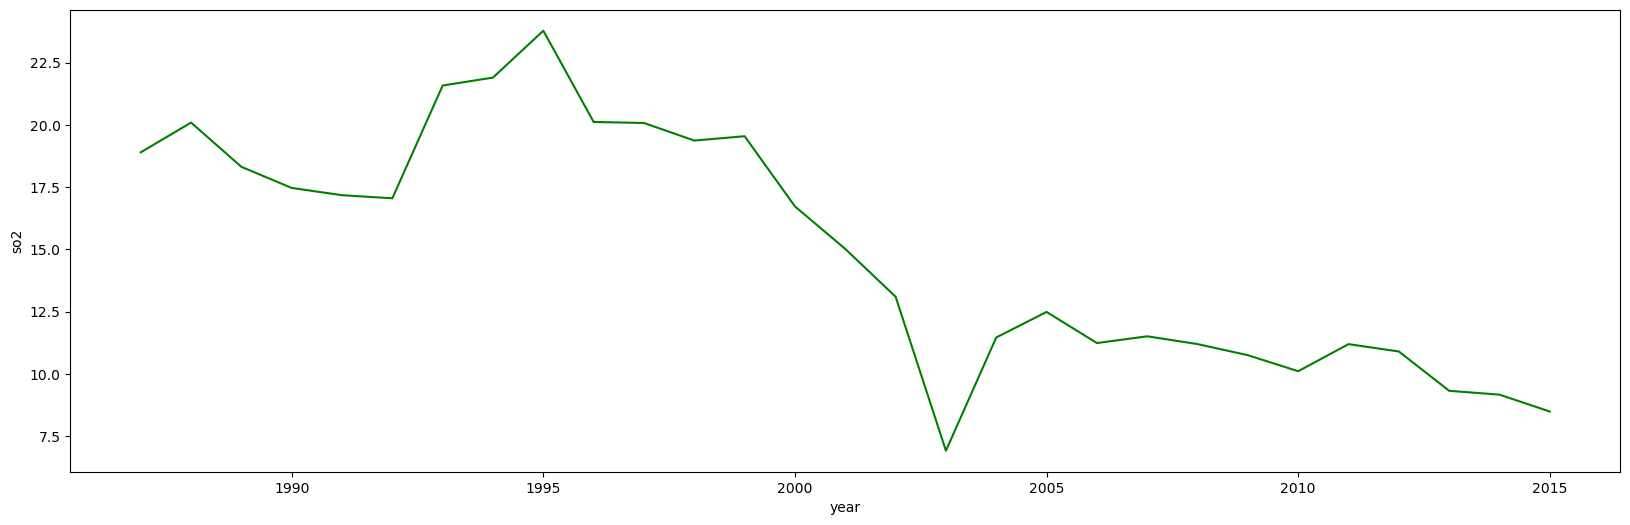

In [43]:
plotv('so2')

In [45]:
def plotvs(state,v):
    data = df[df['state'] == state]
    yearly_aqi = data.groupby('year')['so2'].mean().reset_index()
    plt.figure(figsize=(20, 6))
    sns.lineplot(data=yearly_aqi, x='year', y=v, linestyle='-', color='g')

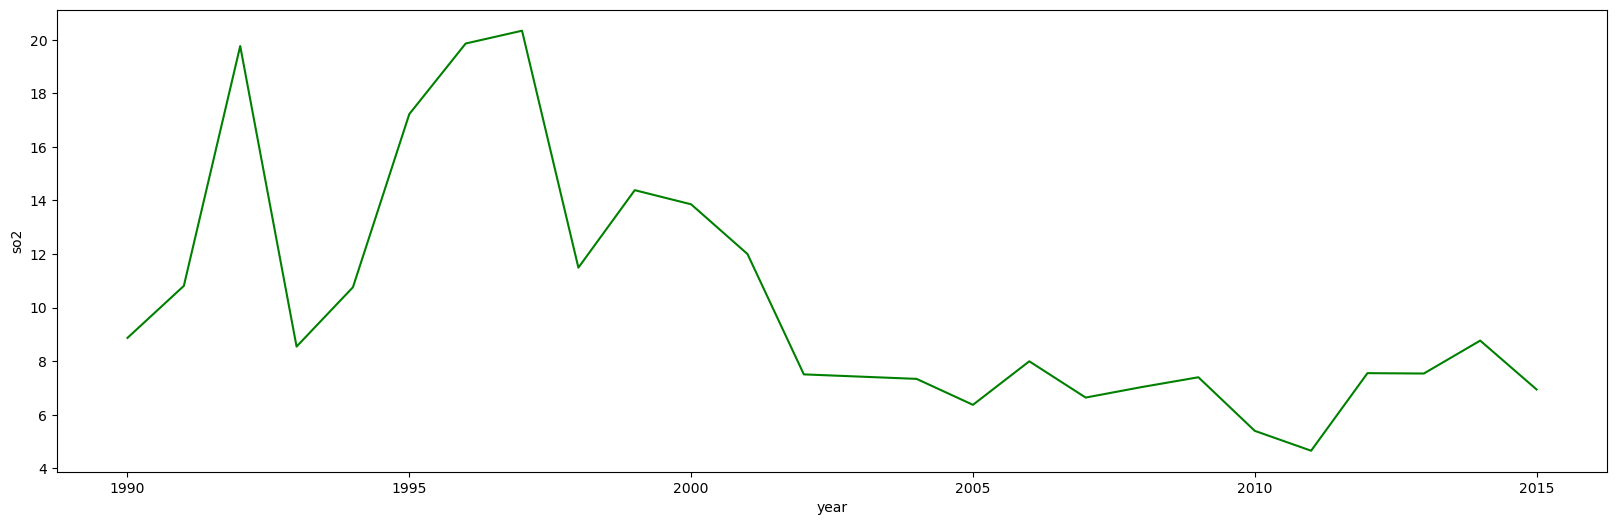

In [47]:
plotvs('Andhra Pradesh','so2')

<Axes: xlabel='type', ylabel='so2'>

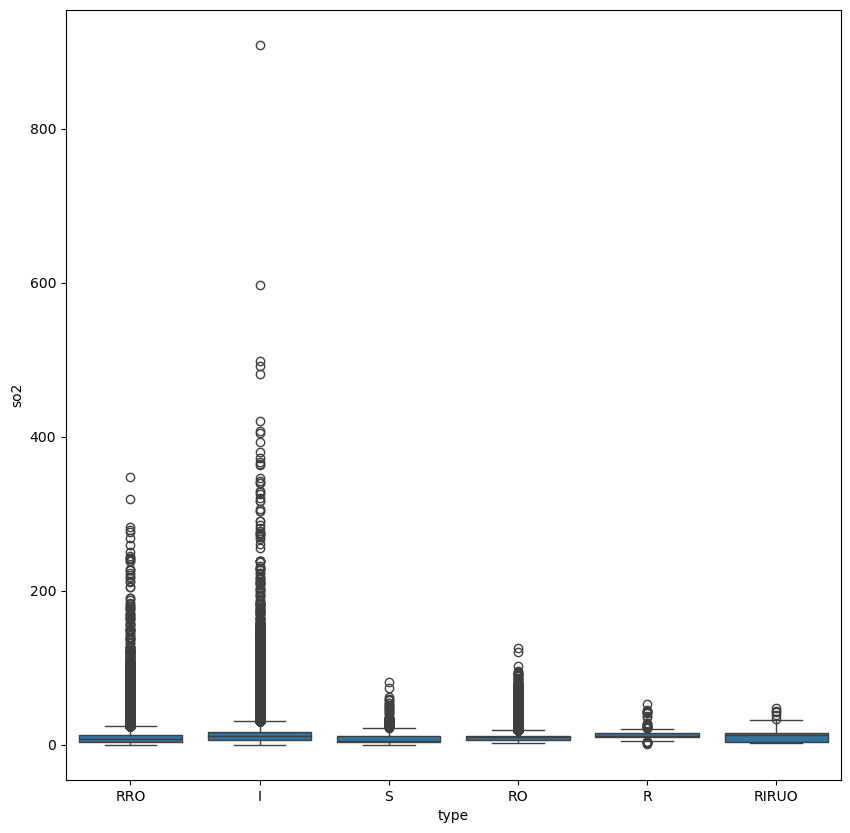

In [69]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='type', y='so2')

<Axes: xlabel='type', ylabel='so2'>

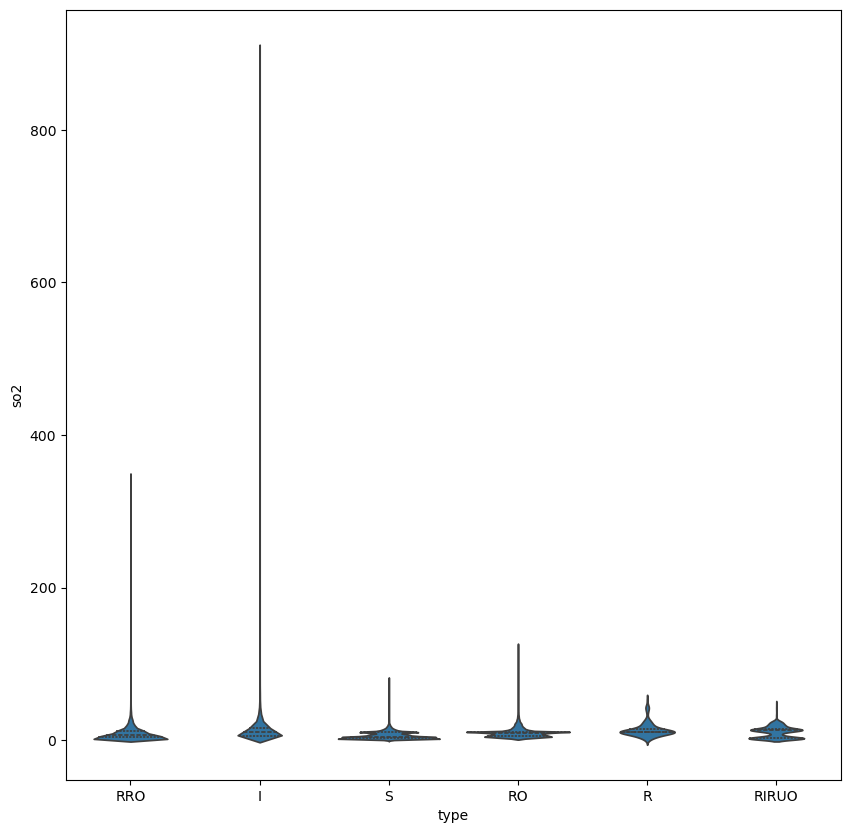

In [71]:
plt.figure(figsize=(10, 10))
sns.violinplot(data=df, x='type', y='so2', inner='quartile')


In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='so2', y='rspm', hue='no2', sizes=(20, 200), legend=True)


<Axes: xlabel='so2', ylabel='rspm'>